In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
Ames = pd.read_excel("http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls")
continious=['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
            'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
            'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

### **Question 1**
plotting univariete continious data

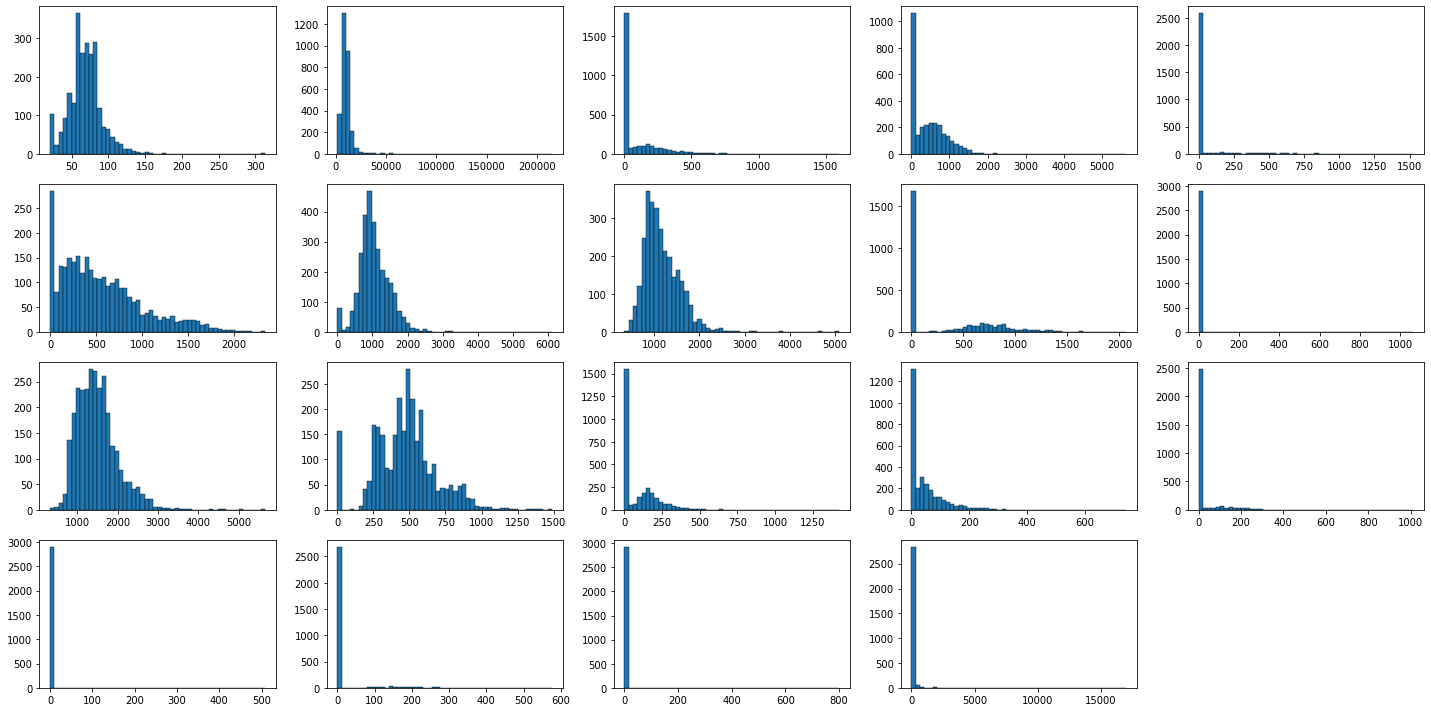

In [4]:
fig, axs = plt.subplots(4,5, figsize=(20,10))
#fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(19):
  axs[i].hist(Ames[continious[i]], bins=50, edgecolor='black', linewidth=0.4, label = continious[i])
fig.delaxes(axs[19])
plt.tight_layout()

### **Question 2**
plotting continious data against target

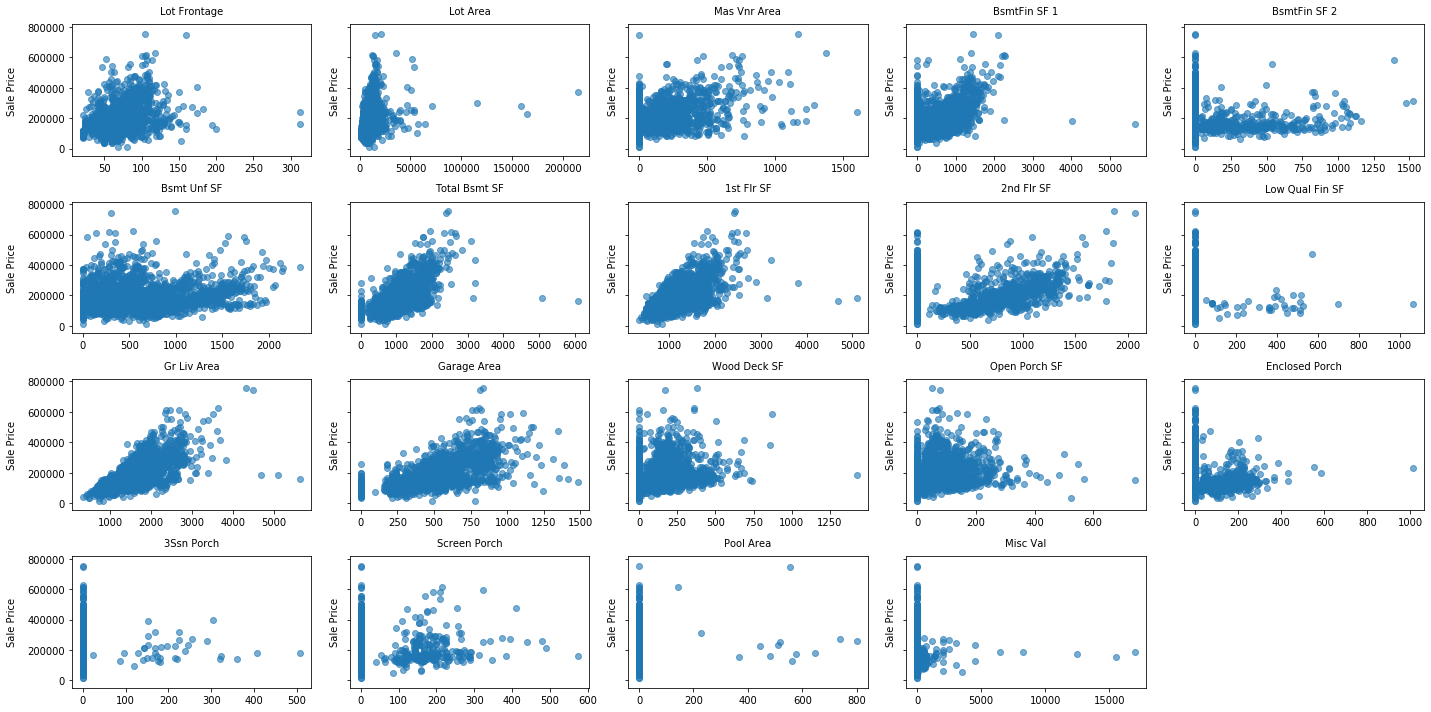

In [5]:
fig1, axs1 = plt.subplots(4,5, figsize=(20,10), sharey=True)
#fig.subplots_adjust(hspace = .5, wspace=.001)

axs1 = axs1.ravel()

for i in range(19):
  axs1[i].scatter(Ames[continious[i]], Ames['SalePrice'], alpha=0.6)
  axs1[i].set_ylabel( 'Sale Price',labelpad=10,fontsize='medium', color= 'black')
  axs1[i].set_xlabel( continious[i],labelpad=10,fontsize='medium', color= 'black')
  axs1[i].xaxis.set_label_position('top')

fig1.delaxes(axs1[19])
plt.tight_layout()

### **Question 3**
cross validate LR on Catagorical data with one hot encoding

In [0]:
Ames_target = pd.DataFrame(Ames, columns = ['SalePrice'])
Ames_dataset = Ames.drop(['SalePrice'], axis=1)
Ames_dataset.drop(['Order', 'PID'], axis=1, inplace=True) # dropping index columns

In [0]:
#Categorical(nominal) column count = 23

Categorical = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
               'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
               'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']

from here working on categogorical columns only to get feature importance

In [0]:
# creating data set of just categorical columns

Cat_data_train = pd.DataFrame(Ames_dataset, columns = Categorical)
Cat_data_target = pd.DataFrame(Ames, columns = ['SalePrice']) # target column copied

In [0]:
#converting NA values in the data set to any string as NA is a category
# if encoded without converying NA's will be considered null values and ignored

for x in Categorical:
  Cat_data_train[x] = Cat_data_train[x].fillna("N.A")

# MS Subclass has categories in integer data type but it is a nominal column 

# so column data type is converted
Cat_data_train['MS SubClass'] = Cat_data_train['MS SubClass'].apply(str)

In [11]:
# One-Hot encoding with Pandas 
encoded_train = pd.get_dummies(Cat_data_train)
encoded_target = pd.DataFrame(Ames, columns = ['SalePrice'])

print(encoded_train.shape)
#encoded_train.dtypes
encoded_train.head()

(2930, 191)


,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_N.A,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_N.A,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_N.A,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
# Data is splitted into train and test to apply cross validation to get r2 value

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_train, encoded_target, random_state=1)

#X_train['MS SubClass'].head()

In [17]:
#importing libraries 

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#temp=X_train.iloc[:,0:15]
scores = cross_val_score( LinearRegression(), X_train.iloc[:,25:27], y_train, cv=10, scoring='r2')
#scores.type()
np.mean(scores)

0.018196535077097686

In [18]:
# printing All r2 value of each feature with linear regression 
for x in Categorical:
  combined_columns = [col for col in X_train if col.startswith(x)]
  scores = cross_val_score( LinearRegression(), X_train[combined_columns], y_train, cv=10, scoring='r2')
  print(x,' : ',np.mean(scores))

MS SubClass  :  0.24195415593502564
MS Zoning  :  0.1167906870988408
Street  :  -0.0014187615105043627
Alley  :  0.01786926514740651
Land Contour  :  0.03478676088322208
Lot Config  :  0.011742844731885416
Neighborhood  :  -2.2640201478623407e+22
Condition 1  :  0.03742366488858
Condition 2  :  -4.615947242333342e+23
Bldg Type  :  0.032164370158442354
House Style  :  0.06919329403554826
Roof Style  :  0.07179491987818157
Roof Matl  :  -2.2310816844090954e+24
Exterior 1st  :  -8.048091961347031e+21
Exterior 2nd  :  -5.477881985177493e+22
Mas Vnr Type  :  -3.399834173584013e+22
Foundation  :  0.27578906767101047
Heating  :  -5.958822565938789e+24
Central Air  :  0.0693316143076515
Garage Type  :  0.2532478472591048
Misc Feature  :  -5.2059785153355585e+23
Sale Type  :  -1.1199501800580841e+22
Sale Condition  :  0.12319830156804798


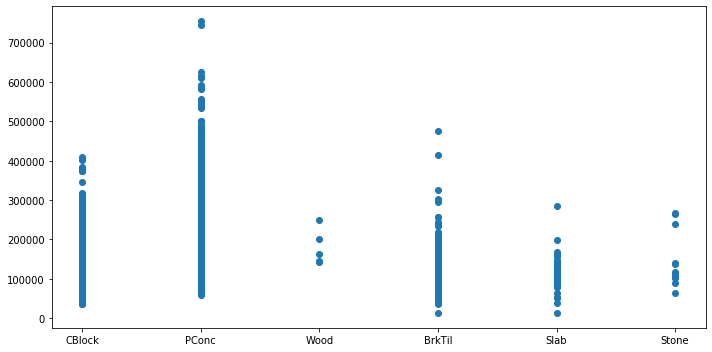

In [22]:
#Plotting feature with max r2 value 
fig2, axs2 = plt.subplots(1,1, figsize=(10,5))
axs2.scatter(Cat_data_train['Foundation'], Cat_data_target)
plt.tight_layout()

#This relation below between categorical foundation feature and target Sale Price
#shows in foundation feature Pound Concrete is most effective and important category 